In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

#這一行表示不希望看到警告訊息
warnings.filterwarnings(action='ignore')

# 資料整理

In [2]:
data=pd.read_csv("kidney_disease.csv")

In [3]:
print("資料筆數:",len(data))
print("欄位數量",len(data.columns))

資料筆數: 400
欄位數量 26


In [4]:
data.head(10)

id   age     bp     sg   al   su       rbc        pc         pcc  \
0   0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1   1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2   2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3   3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4   4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5   5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6   6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7   7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8   8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9   9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   

           ba  ...  pcv     wc   rc  htn   dm  cad appet   pe  ane  \
0  notpresent  ...   44   7800  5.2  yes  yes   no  good   no   no   
1  notpresent  ...   38   6000  NaN   no   no   no  good   no   no   
2  notpresent  ...   31   7500  NaN   no  yes   no  poor   no  yes   
3  notpresent  ...   32   6700  3.9  yes   no   no  poor  yes  yes   
4  notpresent  ...   35   7300  4.6   no   no   no  good   no   no   
5  notpresent  ...   39   7800  4.4  yes  yes   no  good  yes   no   
6  notpresent  ...   36    NaN  NaN   no   no   no  good   no   no   
7  notpresent  ...   44   6900    5   no  yes   no  good  yes   no   
8  notpresent  ...   33   9600  4.0  yes  yes   no  good   no  yes   
9  notpresent  ...   29  12100  3.7  yes  yes   no  poor   no  yes   

  classification  
0            ckd  
1            ckd  
2            ckd  
3            ckd  
4            ckd  
5            ckd  
6            ckd  
7            ckd  
8            ckd  
9            ckd  

[10 rows x 26 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
#不看欄位id

for i in enumerate(data.drop("id",axis=1).columns):
    print('順序:{}, 每個欄位的獨立值 in "{}":\n'.format(i[0]+1,i[1]),data[i[1]].unique())

順序:1, 每個欄位的獨立值 in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
順序:2, 每個欄位的獨立值 in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
順序:3, 每個欄位的獨立值 in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
順序:4, 每個欄位的獨立值 in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
順序:5, 每個欄位的獨立值 in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
順序:6, 每個欄位的獨立值 in "rbc":
 [nan 'normal' 'abnormal']
順序:7, 每個欄位的獨立值 in "pc":
 ['normal' 'abnormal' nan]
順序:8, 每個欄位的獨立值 in "pcc":
 ['notpresent' 'present' nan]
順序:9, 每個欄位的獨立值 in "ba":
 ['notpresent' 'present' nan]
順序:10, 每個欄位的獨立值 in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137

In [7]:
#檢視所有欄位的敘述型統計

data.describe(include='all')

id         age          bp          sg          al  \
count   400.000000  391.000000  388.000000  353.000000  354.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean    199.500000   51.483376   76.469072    1.017408    1.016949   
std     115.614301   17.169714   13.683637    0.005717    1.352679   
min       0.000000    2.000000   50.000000    1.005000    0.000000   
25%      99.750000   42.000000   70.000000    1.010000    0.000000   
50%     199.500000   55.000000   80.000000    1.020000    0.000000   
75%     299.250000   64.500000   80.000000    1.020000    2.000000   
max     399.000000   90.000000  180.000000    1.025000    5.000000   

                su     rbc      pc         pcc          ba  ...  pcv    wc  \
count   351.000000     248     335         396         396  ...  330   295   
unique         NaN       2       2           2           2  ...   44    92   
top            NaN  normal  normal  notpresent  notpresent  ...   41  9800   
freq           NaN     201     259         354         374  ...   21    11   
mean      0.450142     NaN     NaN         NaN         NaN  ...  NaN   NaN   
std       1.099191     NaN     NaN         NaN         NaN  ...  NaN   NaN   
min       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
25%       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
50%       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
75%       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
max       5.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   

         rc  htn   dm  cad appet   pe  ane classification  
count   270  398  398  398   399  399  399            400  
unique   49    2    5    3     2    2    2              3  
top     5.2   no   no   no  good   no   no            ckd  
freq     18  251  258  362   317  323  339            248  
mean    NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
std     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
min     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
25%     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
50%     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
75%     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
max     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  

[11 rows x 26 columns]

In [8]:
#整理資料，把誤值的資料進行修正

for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

In [9]:
#刪除id欄位
data.drop('id',axis=1,inplace=True)
data.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            yes  
1    NaN  ...   38  6000  NaN   no   no  no  good   no   no            yes  
2  423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            yes  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            yes  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            yes  

[5 rows x 25 columns]

In [10]:
#填上有意義的欄位名稱

feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']

data.columns=feature_names

In [11]:
data

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0         48.0                    80.0             1.020      1.0    0.0   
1          7.0                    50.0             1.020      4.0    0.0   
2         62.0                    80.0             1.010      2.0    3.0   
3         48.0                    70.0             1.005      4.0    0.0   
4         51.0                    80.0             1.010      2.0    0.0   
..         ...                     ...               ...      ...    ...   
395       55.0                    80.0             1.020      0.0    0.0   
396       42.0                    70.0             1.025      0.0    0.0   
397       12.0                    80.0             1.020      0.0    0.0   
398       17.0                    60.0             1.025      0.0    0.0   
399       58.0                    80.0             1.025      0.0    0.0   

    Red Blood Cells Pus Cells Pus Cell Clumps    Bacteria  \
0               NaN    normal      notpresent  notpresent   
1               NaN    normal      notpresent  notpresent   
2            normal    normal      notpresent  notpresent   
3            normal  abnormal         present  notpresent   
4            normal    normal      notpresent  notpresent   
..              ...       ...             ...         ...   
395          normal    normal      notpresent  notpresent   
396          normal    normal      notpresent  notpresent   
397          normal    normal      notpresent  notpresent   
398          normal    normal      notpresent  notpresent   
399          normal    normal      notpresent  notpresent   

     Blood Glucose Random (mgs/dL)  ...  Packed Cell Volume  \
0                            121.0  ...                  44   
1                              NaN  ...                  38   
2                            423.0  ...                  31   
3                            117.0  ...                  32   
4                            106.0  ...                  35   
..                             ...  ...                 ...   
395                          140.0  ...                  47   
396                           75.0  ...                  54   
397                          100.0  ...                  49   
398                          114.0  ...                  51   
399                          131.0  ...                  53   

     White Blood Cells (cells/cmm)  Red Blood Cells (millions/cmm)  \
0                             7800                             5.2   
1                             6000                             NaN   
2                             7500                             NaN   
3                             6700                             3.9   
4                             7300                             4.6   
..                             ...                             ...   
395                           6700                             4.9   
396                           7800                             6.2   
397                           6600                             5.4   
398                           7200                             5.9   
399                           6800                             6.1   

     Hypertension  Diabetes Mellitus Coronary Artery Disease Appetite  \
0             yes                yes                      no     good   
1              no                 no                      no     good   
2              no                yes                      no     poor   
3             yes                 no                      no     poor   
4              no                 no                      no     good   
..            ...                ...                     ...      ...   
395            no                 no                      no     good   
396            no                 no                      no     good   
397            no                 no                      no     good   
398            no              

In [12]:
#再看一次整理後的資料

for i in enumerate(data.columns):
    print('順序:{}, 每個欄位的獨立值 in "{}":\n'.format(i[0]+1,i[1]),data[i[1]].unique())

順序:1, 每個欄位的獨立值 in "Age (yrs)":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
順序:2, 每個欄位的獨立值 in "Blood Pressure (mm/Hg)":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
順序:3, 每個欄位的獨立值 in "Specific Gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
順序:4, 每個欄位的獨立值 in "Albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
順序:5, 每個欄位的獨立值 in "Sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
順序:6, 每個欄位的獨立值 in "Red Blood Cells":
 [nan 'normal' 'abnormal']
順序:7, 每個欄位的獨立值 in "Pus Cells":
 ['normal' 'abnormal' nan]
順序:8, 每個欄位的獨立值 in "Pus Cell Clumps":
 ['notpresent' 'present' nan]
順序:9, 每個欄位的獨立值 in "Bacteria":
 ['notpresent' 'present' nan]
順序:10, 每個欄位的獨立值 in "Blood Glucose Random (mgs/dL)":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490.

In [13]:
#有些欄位應該是數值，卻是object，因為有空值(nan)造成，以下三個欄位是肉眼觀察到的

mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]

for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)

#將float64的欄位與肉眼觀察到的欄位合起來，都應該是numberic才對
numeric=numeric+mistyped

In [14]:
#看看數值型欄位
numeric

['Age (yrs)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)']

In [15]:
#轉換為float
for col in mistyped:
        data[col]=data[col].astype('float')

In [16]:
#看看這三個欄位有無變化 (欄位轉程float後，nan並無發生錯誤的結果)

print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [17]:
#觀察這三個欄位的資料型態 (Packed Cell Volume, White Blood Cells (cells/cmm), Red Blood Cells (millions/cmm))
#已經為數值型 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [18]:
#接下來處理類別欄位，且排除掉我們的數值型欄位

categoricals=[]

for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
        
#排除掉最後一個應變數
categoricals.remove('Chronic Kidney Disease')

In [19]:
#看看類別欄位

categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

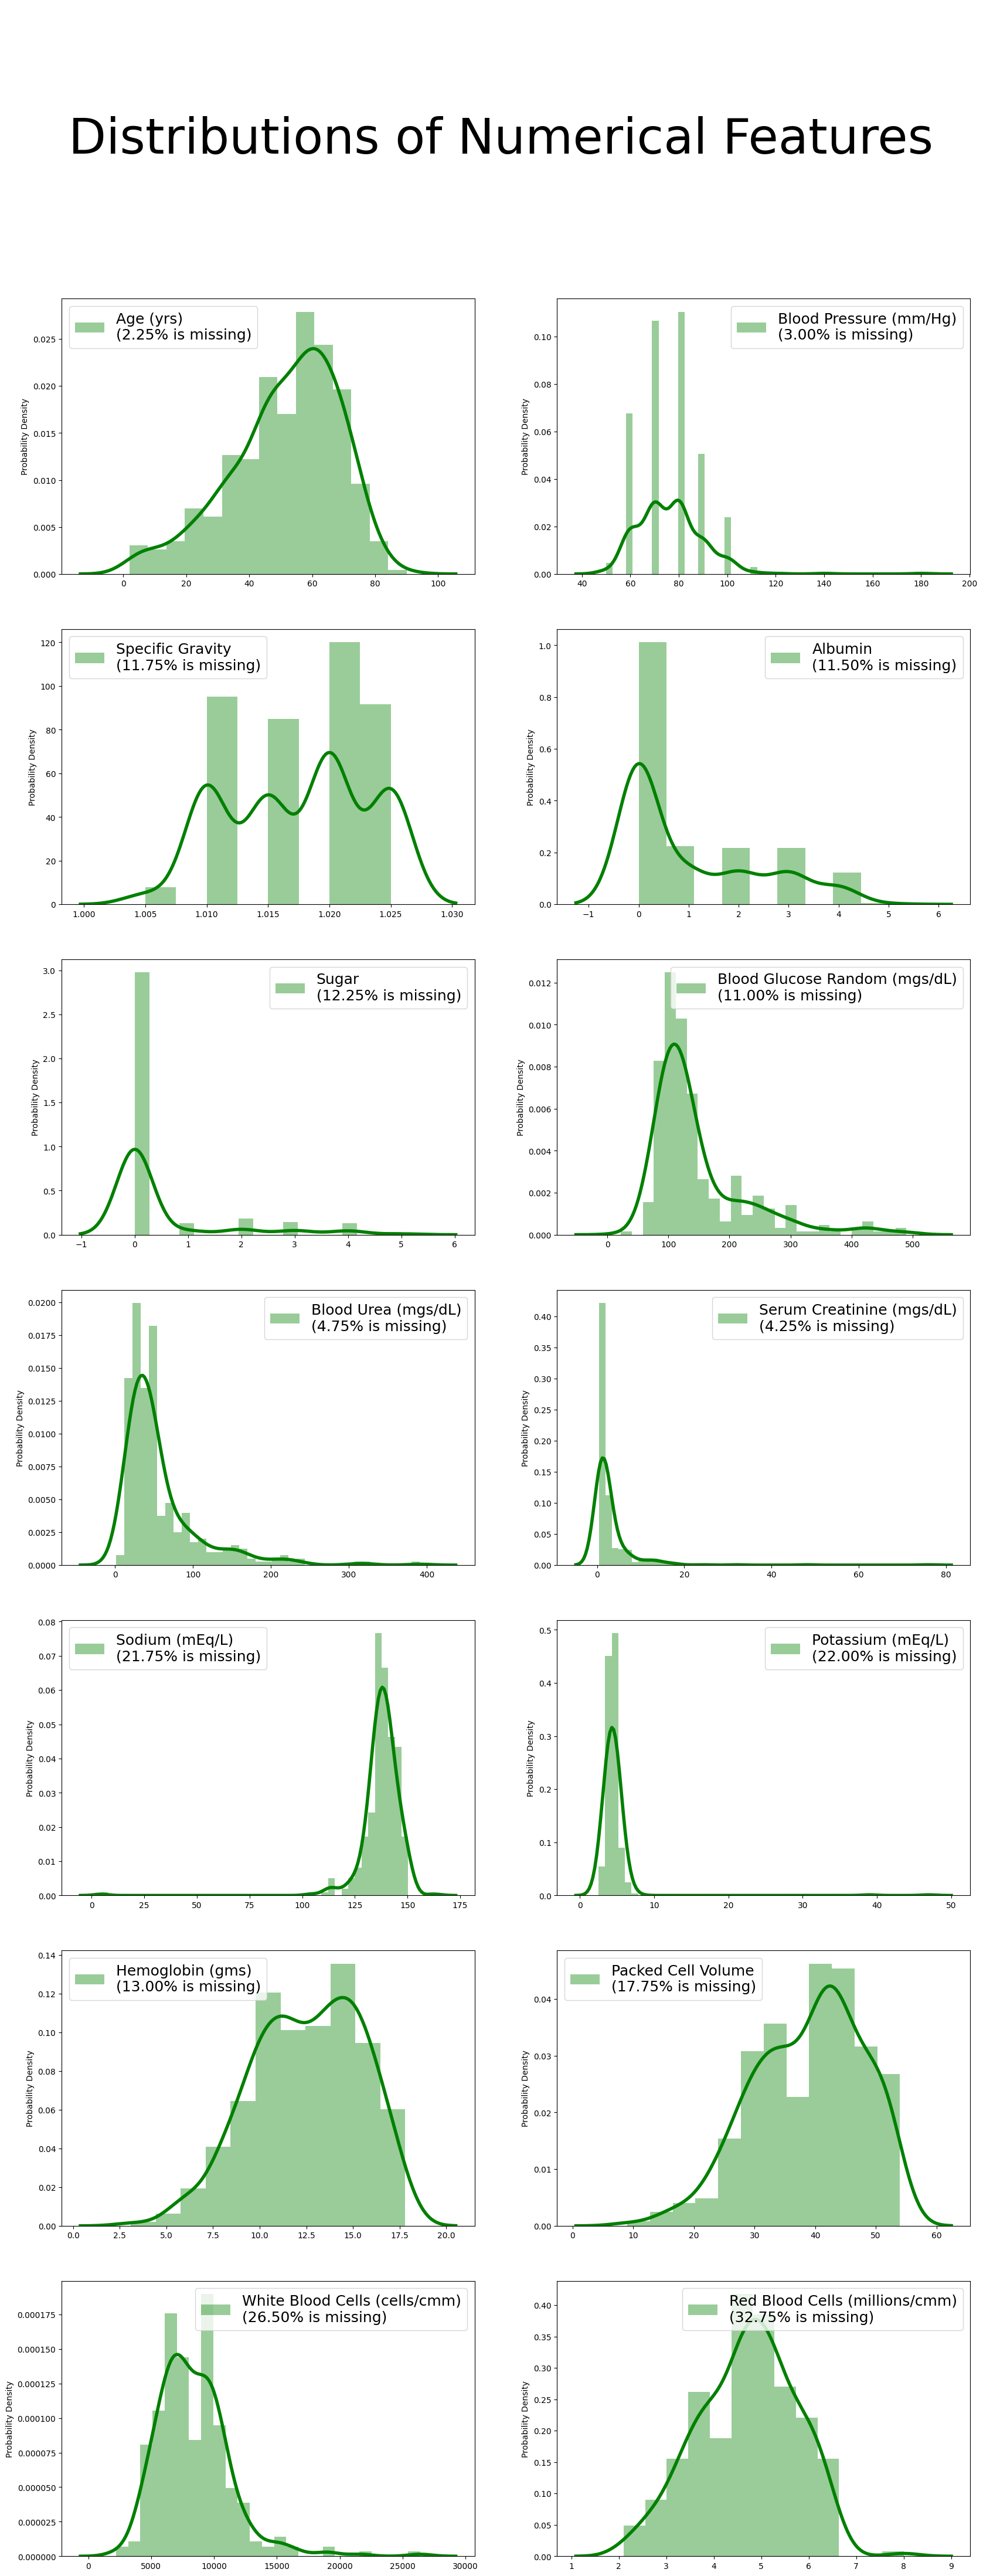

In [20]:
#一覽表視覺化，繪製 (7x2) 的圖表
#數值型欄位

#7x2的圖表
n_rows, n_cols = (7,2)

#每一張圖表大小為20x50
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))

#給予這張一覽表名稱
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

#走訪每一個數值型欄位
#陣列變為 index, column走訪方式，要透過enumerate
for index, column in enumerate(numeric):
    
    #index由0開始
    #例如: 5//2為2(商數)，5%2為1(餘數)
    i,j = (index // n_cols), (index % n_cols)
    
    #計算該欄位去除空值的數量除以該欄位總數量的百分比
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    #文字敘述該欄位遺缺值的百分比
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    #透過seaborn的distplot針對該欄位畫圖
    #需增加常態分佈的線條
    fig=sns.distplot(data[column], color="g", label=collabel, norm_hist=True,
    
    #指派圖形位置，KDE線條寬度為4
    ax=axes[i,j], kde_kws={"lw":4})
    
    #在圖片中顯示文字說明
    #顯示的位置由程式自行判斷 (loc為best)
    fig=fig.legend(loc='best', fontsize=18)
    
    #定義每張圖的y軸說明文字
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    #定義每張圖x軸說明文字為無
    axes[i,j].set_xlabel(None)

plt.show()

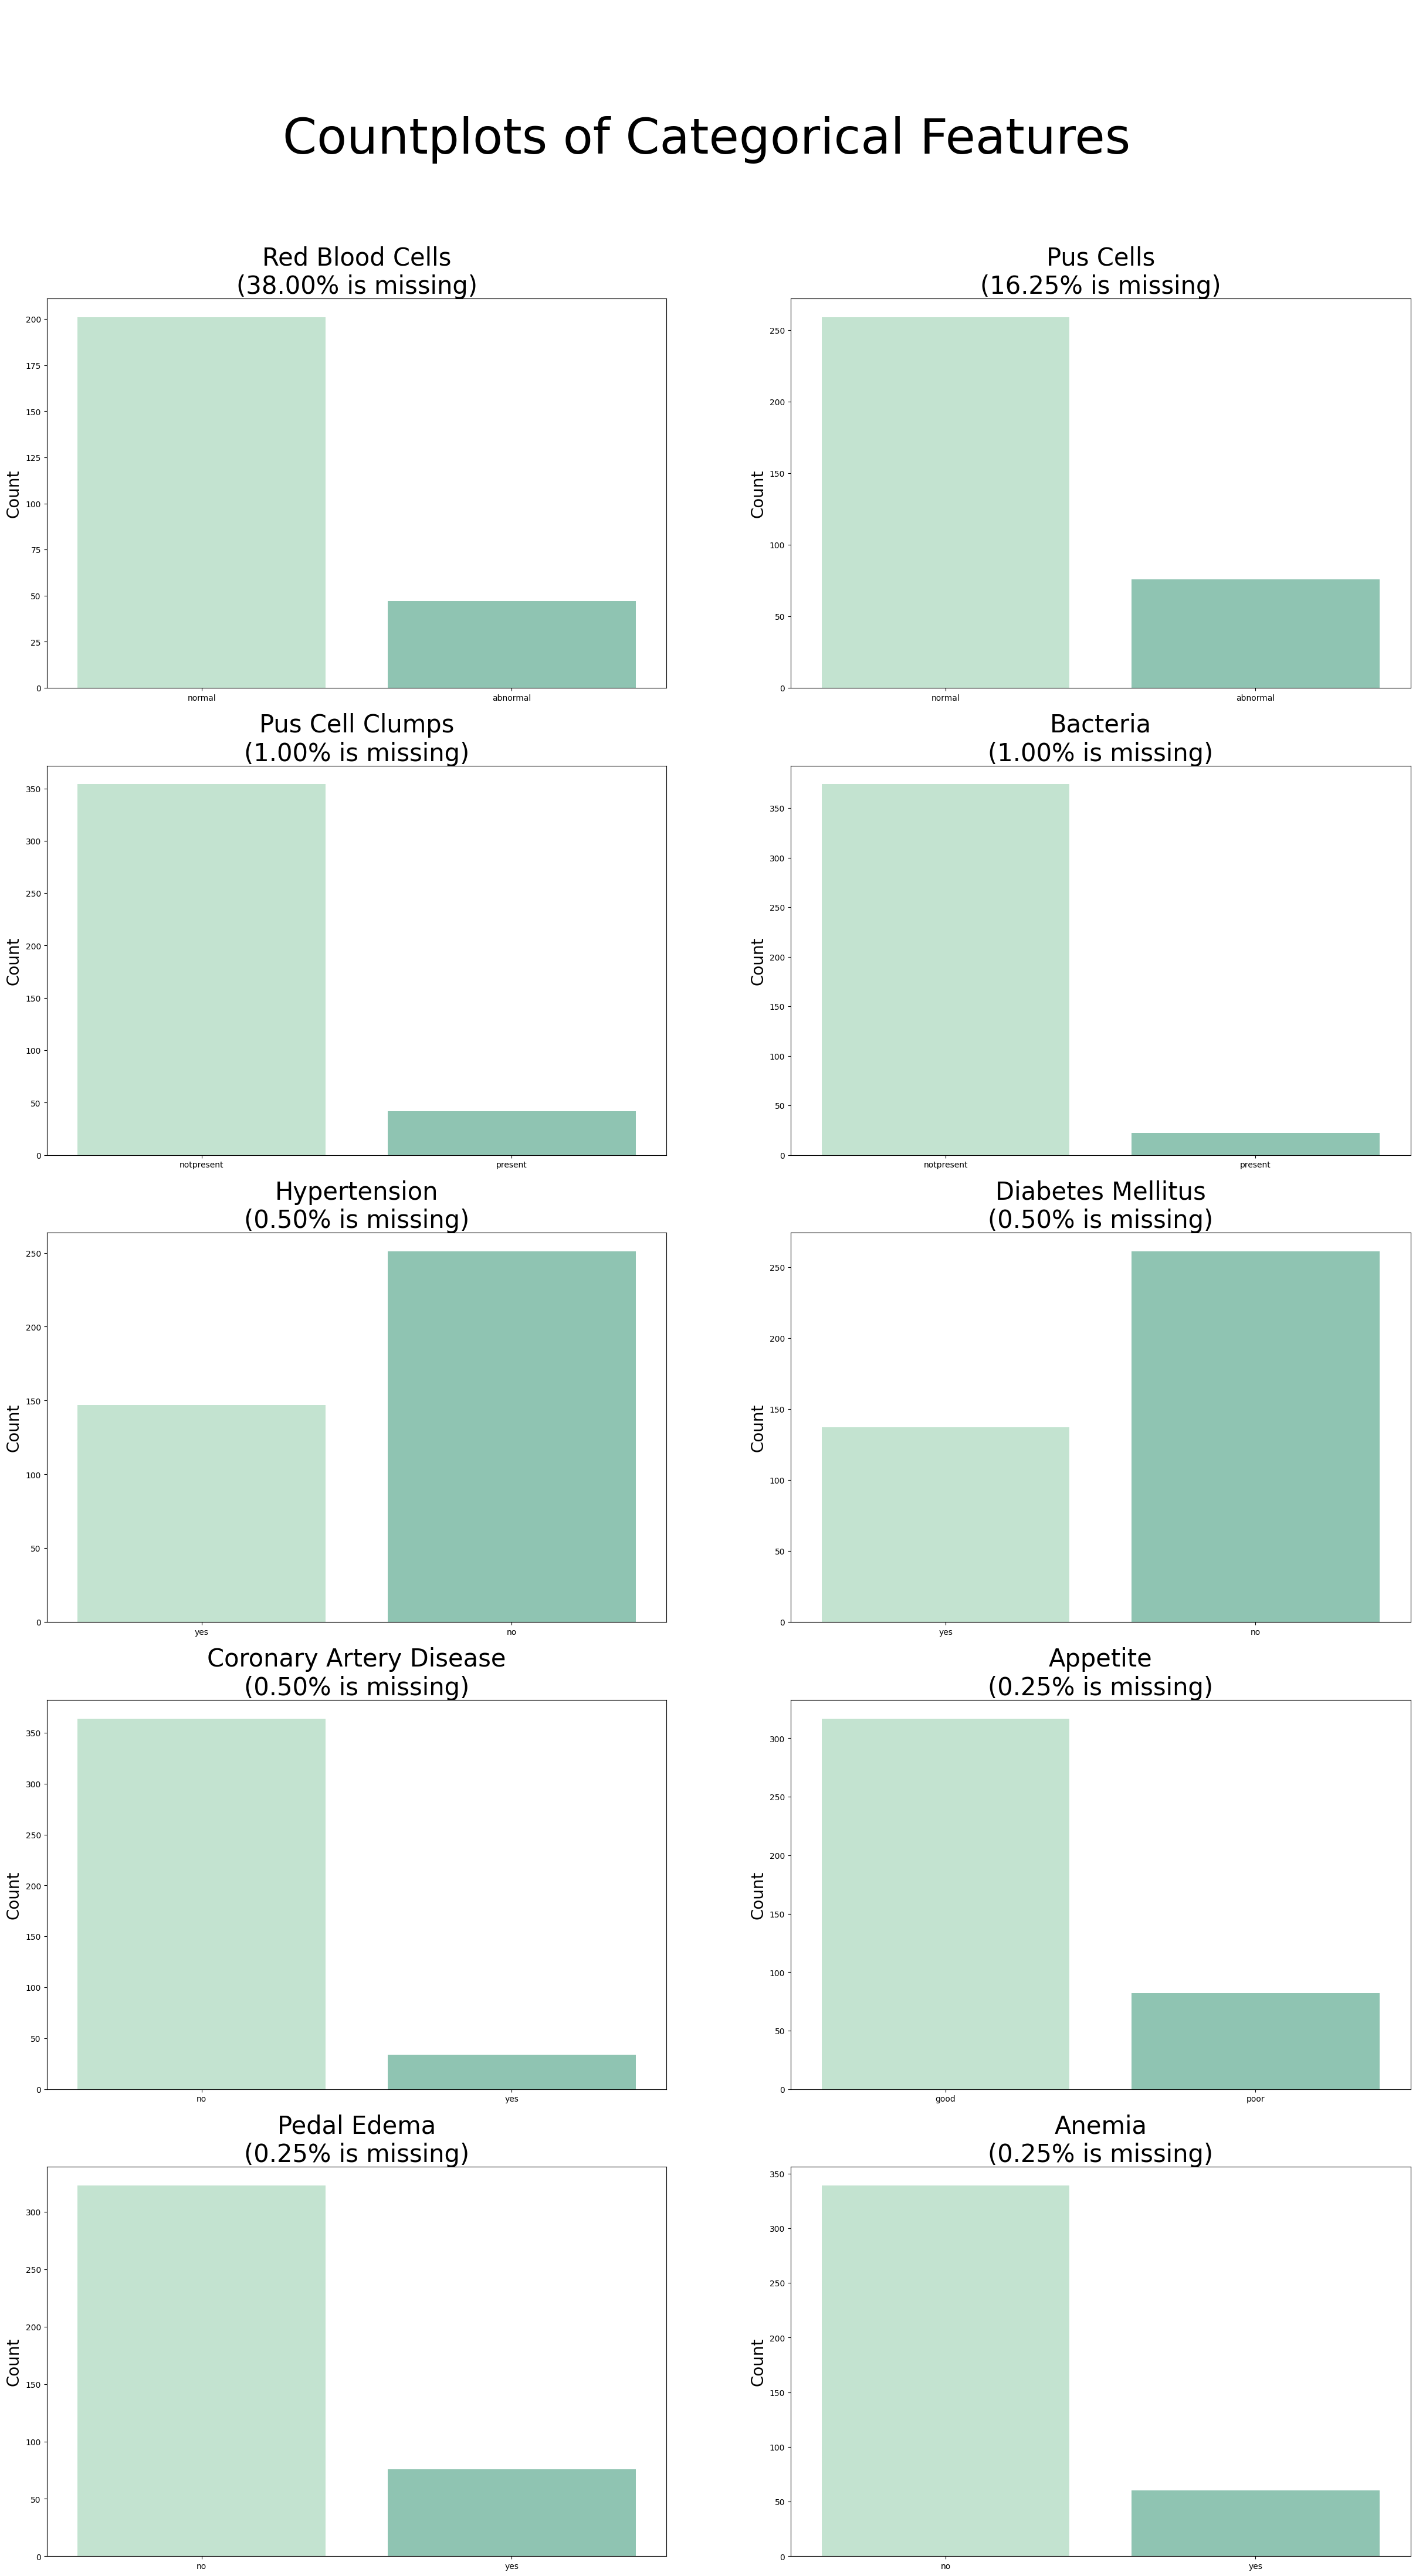

In [21]:
#類別型欄位

n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=data,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=30)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=20)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), fontsize='medium')

plt.show()

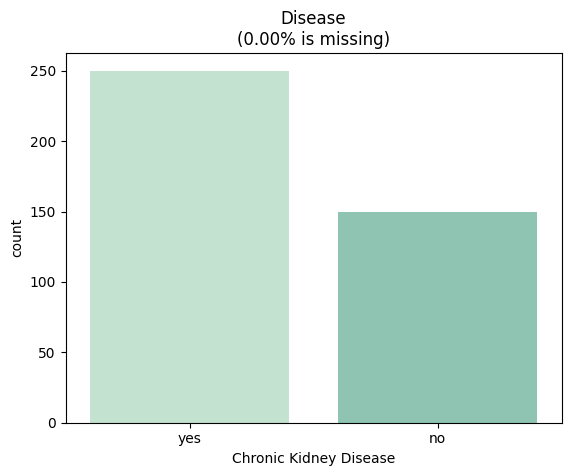

In [22]:
#應變數

miss_perc="%.2f"%(100*(1-(data['Chronic Kidney Disease'].dropna().shape[0])/data.shape[0]))
    
label="Disease\n(missing:\n{}%)".format(miss_perc)

fig=sns.countplot(x=data['Chronic Kidney Disease'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()

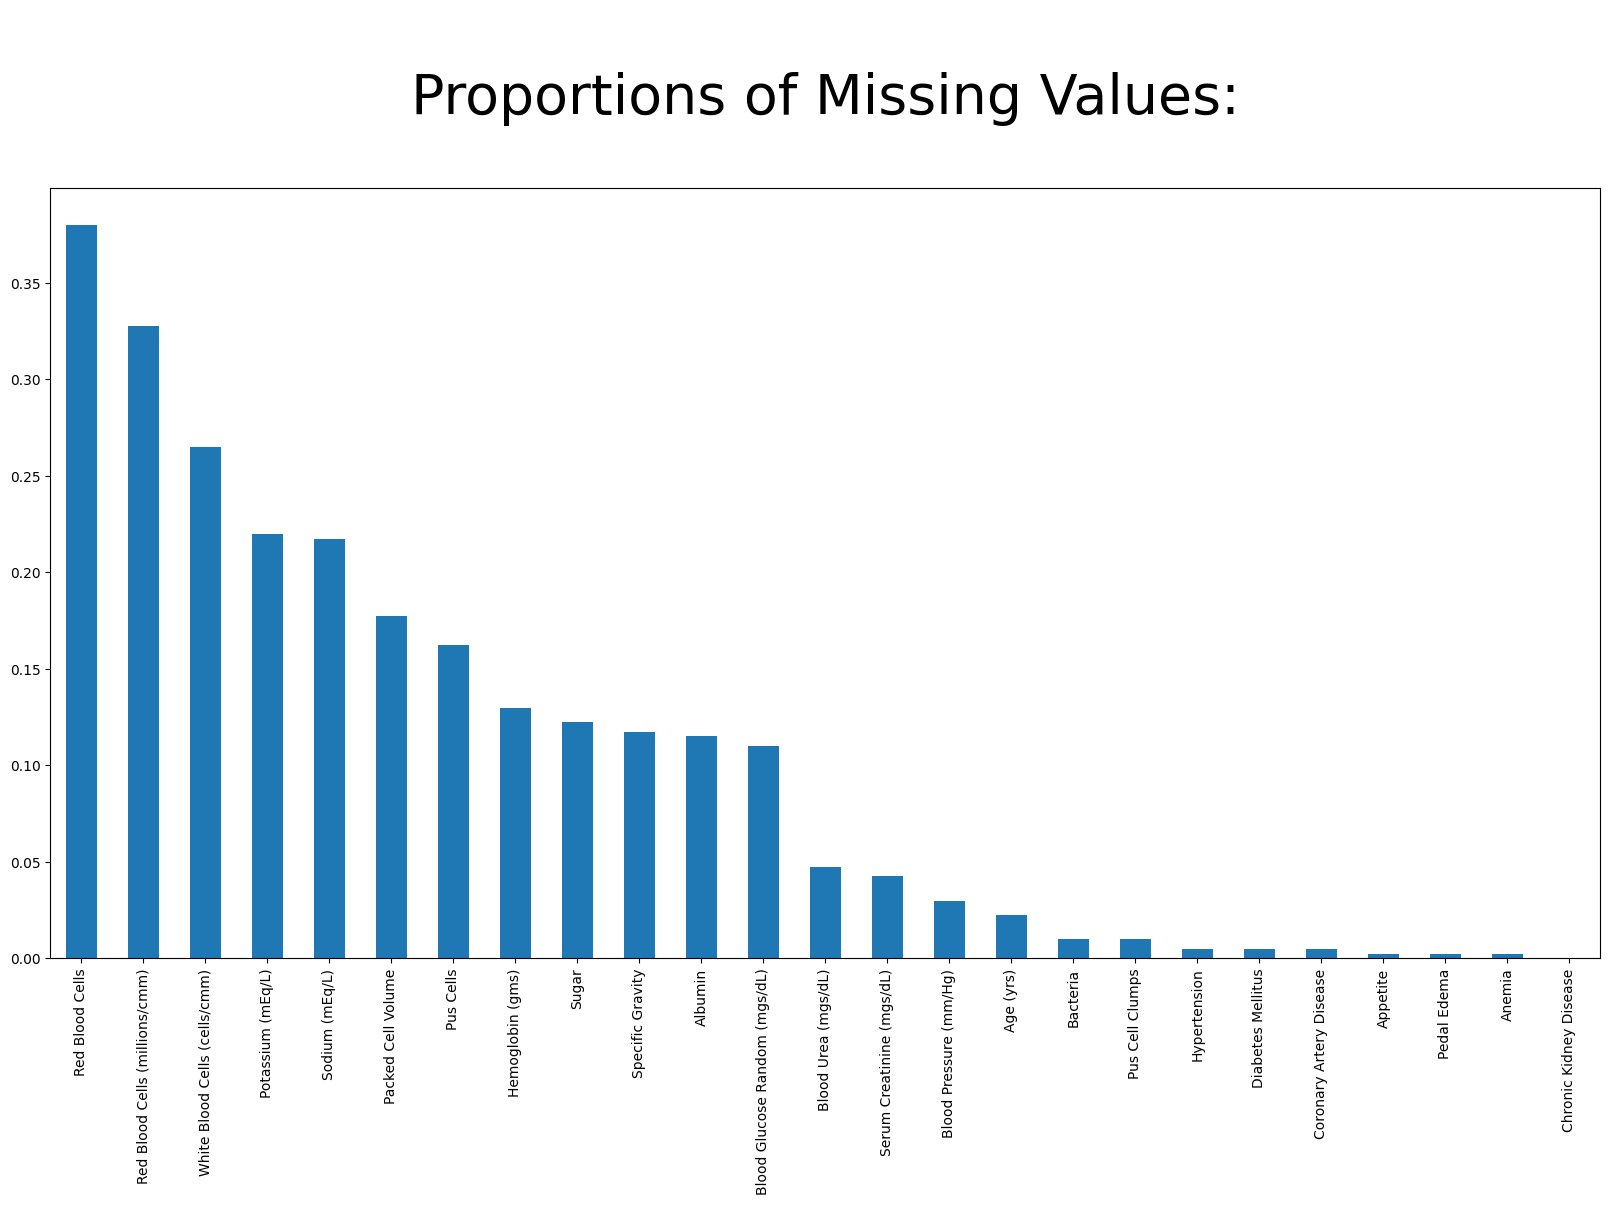

In [23]:
#展示遺缺值的比率
d=((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
#畫一張圖，大小為20x10
d.plot(kind='bar', figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

In [24]:
#類別型欄位塞眾數
for col in categoricals:
    data[col]=data[col].fillna(data[col].mode()[0])

In [25]:
#數值型欄位塞中位數
for col in numeric:
    data[col]=data[col].fillna(data[col].mean())

In [26]:
#再次檢查欄位遺缺值狀態
data.isnull().any()

Age (yrs)                         False
Blood Pressure (mm/Hg)            False
Specific Gravity                  False
Albumin                           False
Sugar                             False
Red Blood Cells                   False
Pus Cells                         False
Pus Cell Clumps                   False
Bacteria                          False
Blood Glucose Random (mgs/dL)     False
Blood Urea (mgs/dL)               False
Serum Creatinine (mgs/dL)         False
Sodium (mEq/L)                    False
Potassium (mEq/L)                 False
Hemoglobin (gms)                  False
Packed Cell Volume                False
White Blood Cells (cells/cmm)     False
Red Blood Cells (millions/cmm)    False
Hypertension                      False
Diabetes Mellitus                 False
Coronary Artery Disease           False
Appetite                          False
Pedal Edema                       False
Anemia                            False
Chronic Kidney Disease            False


In [27]:
#進行 dummy-variable (僅針對類別型欄位)
#欄位名稱會改變
dummydata=pd.get_dummies(data,drop_first=True,prefix_sep=': ')
dummydata.head()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0       48.0                    80.0             1.020      1.0    0.0   
1        7.0                    50.0             1.020      4.0    0.0   
2       62.0                    80.0             1.010      2.0    3.0   
3       48.0                    70.0             1.005      4.0    0.0   
4       51.0                    80.0             1.010      2.0    0.0   

   Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                     121.000000                 36.0   
1                     148.036517                 18.0   
2                     423.000000                 53.0   
3                     117.000000                 56.0   
4                     106.000000                 26.0   

   Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  ...  \
0                        1.2      137.528754           4.627244  ...   
1                        0.8      137.528754           4.627244  ...   
2                        1.8      137.528754           4.627244  ...   
3                        3.8      111.000000           2.500000  ...   
4                        1.4      137.528754           4.627244  ...   

   Pus Cells: normal  Pus Cell Clumps: present  Bacteria: present  \
0                  1                         0                  0   
1                  1                         0                  0   
2                  1                         0                  0   
3                  0                         1                  0   
4                  1                         0                  0   

   Hypertension: yes  Diabetes Mellitus: yes  Coronary Artery Disease: yes  \
0                  1                       1                             0   
1                  0                       0                             0   
2                  0                       1                             0   
3                  1                       0                             0   
4                  0                       0                             0   

   Appetite: poor  Pedal Edema: yes  Anemia: yes  Chronic Kidney Disease: yes  
0               0                 0            0                            1  
1               0                 0            0                            1  
2               1                 0            1                            1  
3               1                 1            1                            1  
4               0                 0            0                            1  

[5 rows x 25 columns]

In [28]:
#查看欄位名稱
dummydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       400 non-null    float64
 1   Blood Pressure (mm/Hg)          400 non-null    float64
 2   Specific Gravity                400 non-null    float64
 3   Albumin                         400 non-null    float64
 4   Sugar                           400 non-null    float64
 5   Blood Glucose Random (mgs/dL)   400 non-null    float64
 6   Blood Urea (mgs/dL)             400 non-null    float64
 7   Serum Creatinine (mgs/dL)       400 non-null    float64
 8   Sodium (mEq/L)                  400 non-null    float64
 9   Potassium (mEq/L)               400 non-null    float64
 10  Hemoglobin (gms)                400 non-null    float64
 11  Packed Cell Volume              400 non-null    float64
 12  White Blood Cells (cells/cmm)   400 

# 資料視覺化

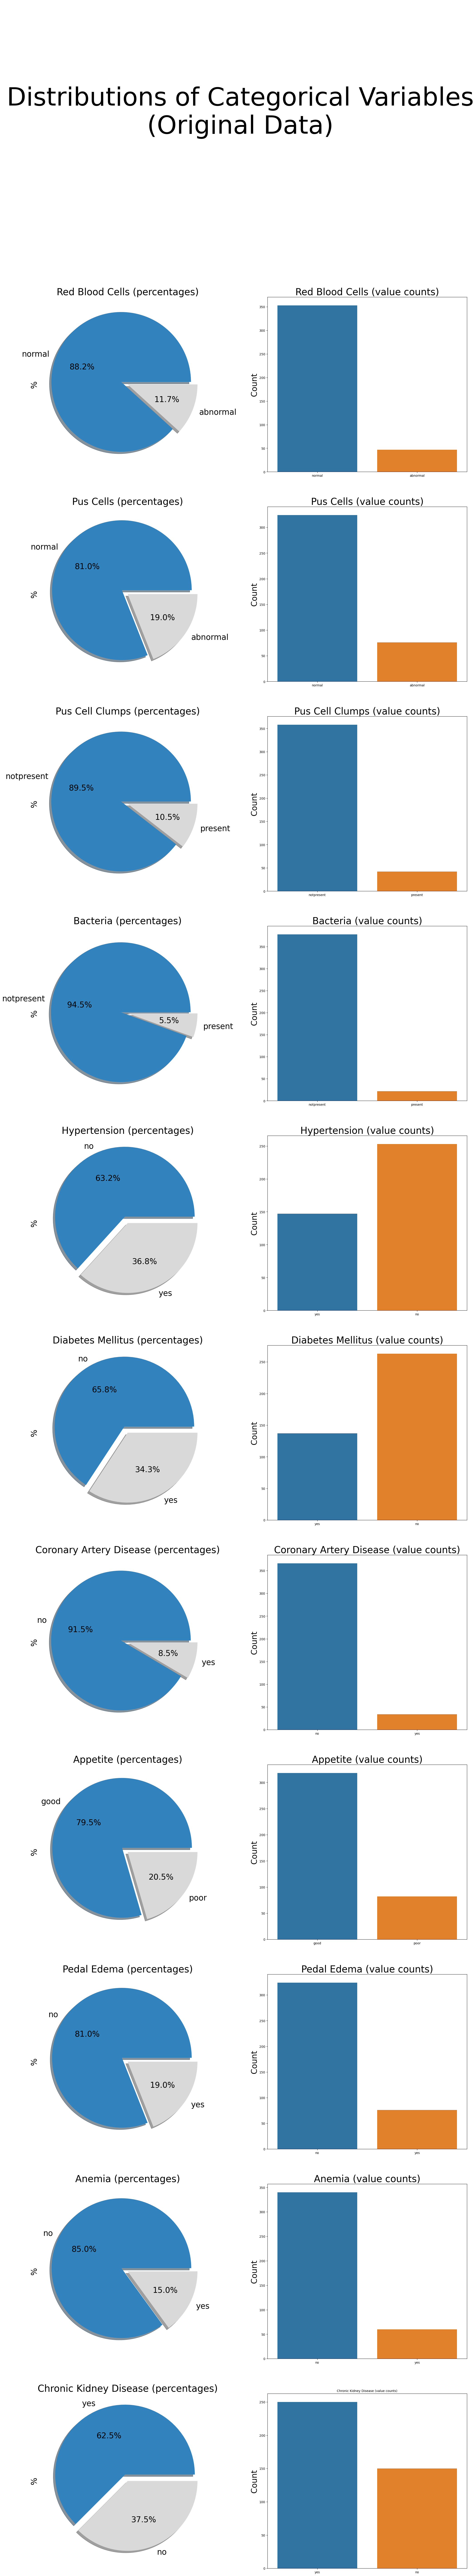

In [29]:
#塞值後觀察各欄位分布 (類別型欄位)

n_rows, n_cols = (11,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 130))
figure.suptitle('\n\n\nDistributions of Categorical Variables\n(Original Data)', fontsize=80)

#針對每一個類別型欄位
for i in range(len(categoricals)):
    column=categoricals[i]
    #畫圓餅圖
    graph1=data[column].value_counts().plot.pie(autopct='%1.1f%%',
                                                ax=axes[i,0],
                                                colormap="tab20c",
                                                fontsize=25,
                                                shadow=True,
                                                explode=[0.1,0])
    #設定圓餅圖顯示資訊
    axes[i,0].set_ylabel('%',fontsize=25)
    axes[i,0].set_title(column+' (percentages)', fontsize=30)
    
    #顯示長條圖(bar-chart)
    graph2=sns.countplot(x=column,
                         data=data,
                         ax=axes[i,1])
    #設定長條圖顯示資訊
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=25)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels())
    axes[i,1].set_title(column+' (value counts)', fontsize=30)
    

#針對應變數欄位(Chronic Kidney Disease)進行圓餅圖
graph1=data['Chronic Kidney Disease'].value_counts().plot.pie(autopct='%1.1f%%',
                                                              ax=axes[10,0],
                                                              colormap='tab20c',
                                                              fontsize=25,
                                                              shadow=True,
                                                              explode=[0.1,0])
axes[10,0].set_ylabel("%",fontsize=25)
axes[10,0].set_title('Chronic Kidney Disease (percentages)',fontsize=30)


graph2=sns.countplot(x='Chronic Kidney Disease',
                     data=data,
                     ax=axes[10,1])
axes[10,1].set_xlabel(None,fontsize=25)
axes[10,1].set_ylabel("Count",fontsize=25)
axes[10,1].set_xticklabels(axes[10,1].get_xticklabels())
axes[10,1].set_title('Chronic Kidney Disease (value counts)', fontsize='medium')

plt.show()

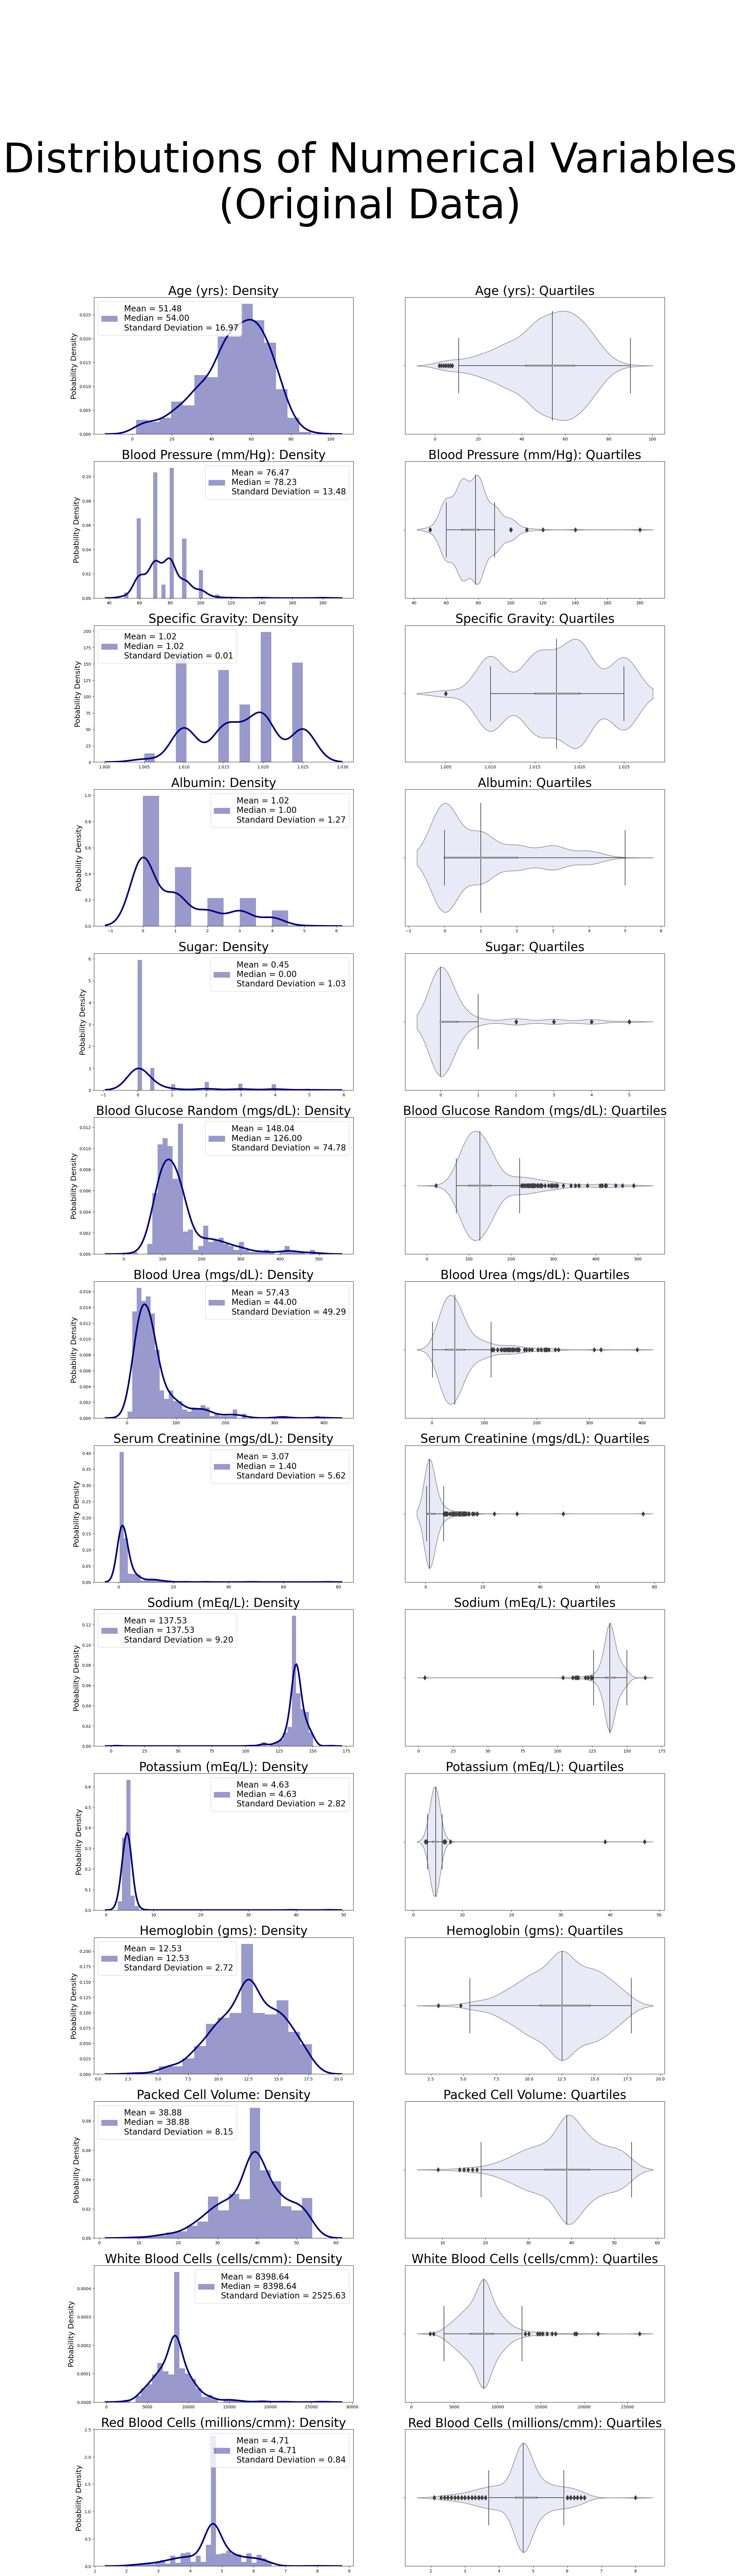

In [30]:
#塞值後觀察各欄位分布 (數值型欄位)

n_rows, n_cols = (14,2)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 100))
figure.suptitle('\n\n\nDistributions of Numerical Variables\n(Original Data)', fontsize=100)

#走訪每一個欄位
for i in range(len(numeric)):
    
    #處理的欄位
    col=numeric[i]
    
    #每個圖表都要顯示平均值、中位數、標準差
    label='Mean = {}\nMedian = {}\nStandard Deviation = {}'.format("%.2f"%data[col].mean(),
                                                                   "%.2f"%data[col].median(),
                                                                   "%.2f"%data[col].std())
    #繪製distplot圖表
    graph1=sns.distplot(data[col],
                        color="navy",
                        ax=axes[i,0],
                        kde_kws={"lw":4},
                        norm_hist=True,
                        label=label).legend(loc='best',fontsize=20)
    axes[i,0].set_title(col+': Density',fontsize=30)
    axes[i,0].set_xlabel(None)
    axes[i,0].set_ylabel("Pobability Density",fontsize=18)

    #繪製小提琴圖
    graph20=sns.violinplot(x=col,
                          data=data,
                          ax=axes[i,1],
                          color='lavender',
                          inner='box')
    #將小提琴圖內的線條補上 (25%, 50% 75% 與 IQR 與 outlier)
    graph21=sns.boxplot(x=col,
                        data=data,
                        ax=axes[i,1],
                        fliersize=8,
                        boxprops=dict(alpha=0))
    
    axes[i,1].set_xlabel(None)
    axes[i,1].set_title(col+': Quartiles',fontsize=30)
    
    
plt.show()

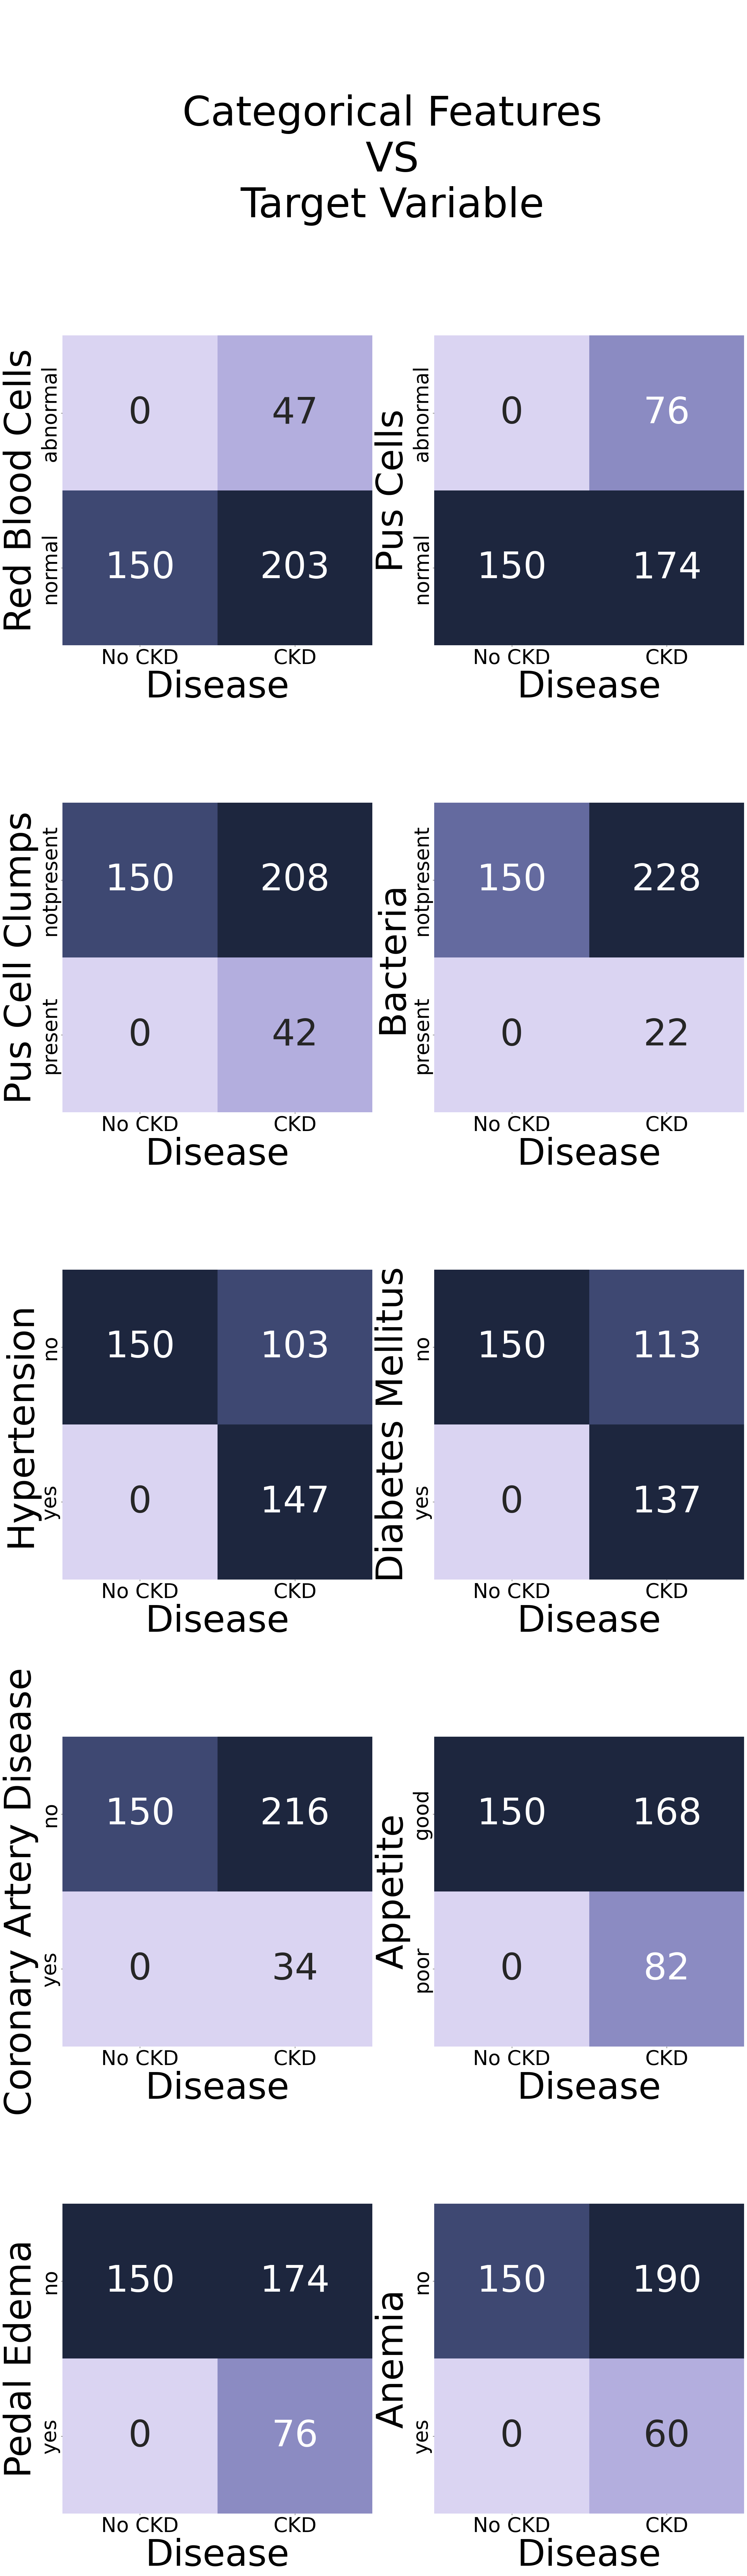

In [31]:
#類別型變數與應變數
n_rows, n_cols = (5,2)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 100))
figure.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=100)

#走訪每一個欄位
for index, column in enumerate(categoricals):
    
    i,j = (index // n_cols), (index % n_cols)
    
    #繪製熱力圖
    sns.heatmap(pd.crosstab(data[column],data['Chronic Kidney Disease']),
                ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':90},
                fmt='d')
        
    axes[i,j].set_xlabel("Disease", fontsize=90)

    axes[i,j].set_ylabel(column,fontsize=90)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=50)
    
    axes[i,j].set_xticklabels(["No CKD","CKD"],fontsize=50)

plt.show()

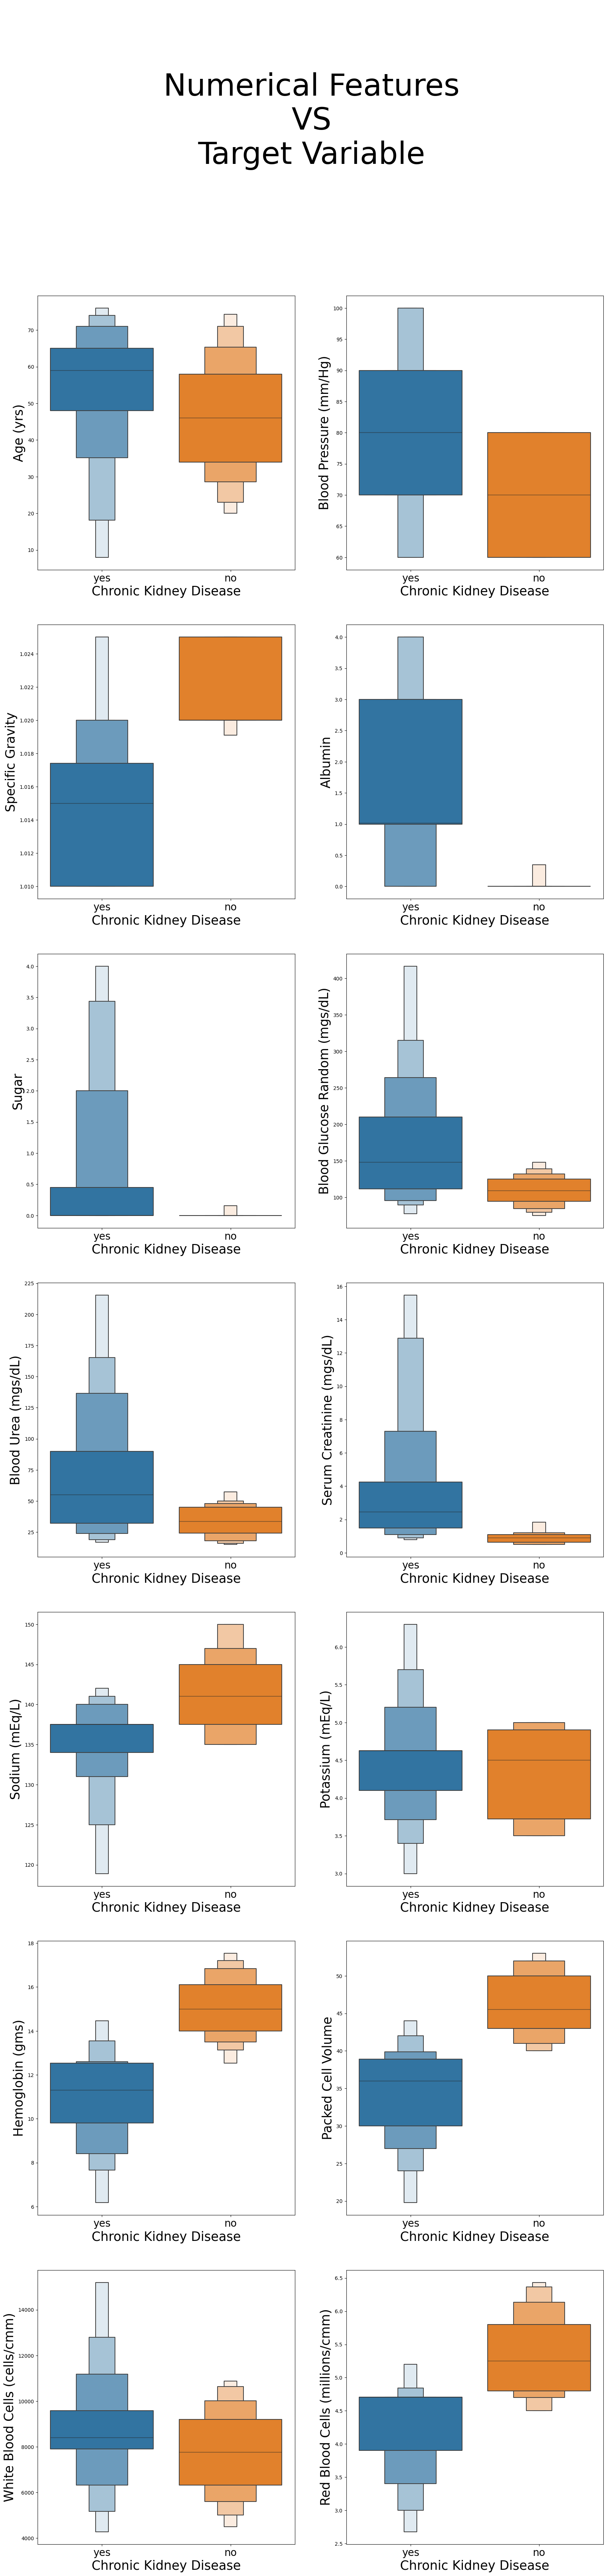

In [32]:
#連續型變數與應變數
n_rows, n_cols = (7,2)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))
figure.suptitle('\n\nNumerical Features\nVS\nTarget Variable', fontsize=60)

#走訪每一個欄位
for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    #繪製盒鬚圖
    bp=sns.boxenplot(y=column, x='Chronic Kidney Disease', data=data, ax=axes[i,j], showfliers=False)
        
    axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=25)

    axes[i,j].set_ylabel(column,fontsize=25)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),fontsize=20)

plt.show()

# 準備開始進行 Kmeans
# 目的是要針對腎臟病患者，進行分群分析

In [33]:
#準備資料
X=dummydata.drop("Chronic Kidney Disease: yes",axis=1,inplace=False)
y=dummydata["Chronic Kidney Disease: yes"]

print("資料筆數:",len(X))
print("欄位數量:",len(X.columns))

資料筆數: 400
欄位數量: 24


In [34]:
#提供多種scale的方式

#以下四種是最常見的標準化函數
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [35]:
full_scaled_data=SS.fit_transform(X)
scaled_data=SS.fit_transform(full_scaled_data)

In [36]:
from sklearn.cluster import KMeans

轉折點目前發現5可以試試看作為K值


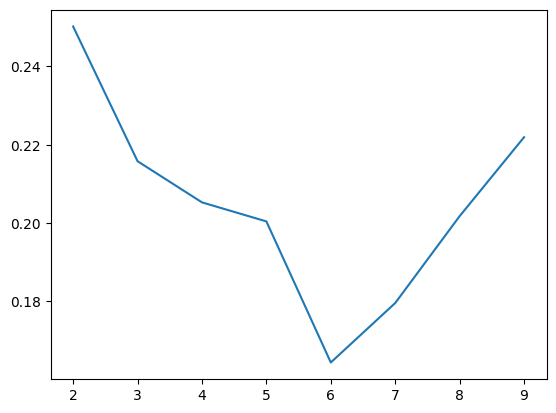

In [37]:
#透過輪廓係數(-1,1) 該值越大表示分群效果越好

from sklearn.metrics import silhouette_score

silhouette_avg = []

#由第2群找到第10群，觀察轉折點 (轉折點就是變化量最大的地方，不是看該值的大小)
for i in range(2,10):
    kmeans_fit = KMeans(n_clusters = i).fit(scaled_data)
    silhouette_avg.append(silhouette_score(scaled_data, kmeans_fit.labels_))
    
plt.plot(range(2,10), silhouette_avg)

print("轉折點目前發現{}可以試試看作為K值".format(5))

In [38]:
#選擇分群數量(K值為5)
n_clusters = 5

#建立Kmeans演算法
kmean = KMeans(n_clusters=n_clusters)

kmean.fit(scaled_data);
print("kmean: k={}".format(n_clusters))

#取得分群結果 (每筆資料都會一個分群代碼，由0開始)
labels = kmean.labels_

#取得分群的中心點(質心)
centers = kmean.cluster_centers_

kmean: k=5


In [39]:
#將分群結果寫入dataframe，有利於分群分析
data['group']=labels

In [40]:
#查看個群數量，由第0群開始排序
data['group'].value_counts().sort_index()

0      2
1    197
2     48
3    118
4     35
Name: group, dtype: int64

In [41]:
#質心
print(centers.shape)

#將質心存起來，下次Re-fresh的時候還可以用
from numpy import savetxt, loadtxt
savetxt('ckd_kmeans_centers.csv', centers, delimiter=',')

#讀取質心的檔案
load_centers = loadtxt('ckd_kmeans_centers.csv', delimiter=',')

#再次執行kmeans程式
kmean_test_centers = KMeans(n_clusters=n_clusters,init=load_centers)
kmean_test_centers.fit(scaled_data)
labels_test_centers = kmean_test_centers.labels_

#將分群結果寫入dataframe，有利於分群分析
data['group_test_centers']=labels_test_centers

(5, 24)


In [42]:
#欄位group與group_test_centers分群結果一模一樣
data

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0         48.0                    80.0             1.020      1.0    0.0   
1          7.0                    50.0             1.020      4.0    0.0   
2         62.0                    80.0             1.010      2.0    3.0   
3         48.0                    70.0             1.005      4.0    0.0   
4         51.0                    80.0             1.010      2.0    0.0   
..         ...                     ...               ...      ...    ...   
395       55.0                    80.0             1.020      0.0    0.0   
396       42.0                    70.0             1.025      0.0    0.0   
397       12.0                    80.0             1.020      0.0    0.0   
398       17.0                    60.0             1.025      0.0    0.0   
399       58.0                    80.0             1.025      0.0    0.0   

    Red Blood Cells Pus Cells Pus Cell Clumps    Bacteria  \
0            normal    normal      notpresent  notpresent   
1            normal    normal      notpresent  notpresent   
2            normal    normal      notpresent  notpresent   
3            normal  abnormal         present  notpresent   
4            normal    normal      notpresent  notpresent   
..              ...       ...             ...         ...   
395          normal    normal      notpresent  notpresent   
396          normal    normal      notpresent  notpresent   
397          normal    normal      notpresent  notpresent   
398          normal    normal      notpresent  notpresent   
399          normal    normal      notpresent  notpresent   

     Blood Glucose Random (mgs/dL)  ...  Red Blood Cells (millions/cmm)  \
0                       121.000000  ...                        5.200000   
1                       148.036517  ...                        4.707435   
2                       423.000000  ...                        4.707435   
3                       117.000000  ...                        3.900000   
4                       106.000000  ...                        4.600000   
..                             ...  ...                             ...   
395                     140.000000  ...                        4.900000   
396                      75.000000  ...                        6.200000   
397                     100.000000  ...                        5.400000   
398                     114.000000  ...                        5.900000   
399                     131.000000  ...                        6.100000   

     Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
0             yes                yes                       no      good   
1              no                 no                       no      good   
2              no                yes                       no      poor   
3             yes                 no                       no      poor   
4              no                 no                       no      good   
..            ...                ...                      ...       ...   
395            no                 no                       no      good   
396            no                 no                       no      good   
397            no                 no                       no      good   
398            no                 no                       no      good   
399            no                 no                       no      good   

     Pedal Edema  Anemia  Chronic Kidney Disease group group_test_centers  
0             no      no                     yes     1                  1  
1             no      no                     yes     1                  1  
2             no     yes                     yes     3                  3  
3            yes     yes                     yes     2                  2  
4             no      no                     yes     1                  1  
..           ...     ...                     ...   ...                ...  
395           no      no 

# 作業

In [43]:
#hw(這是第0群)

#請觀查這些變數(透過平均值、中位數...敘述型統計)，給予該群一個名稱定義 (例如: 代謝症候群等等)
#並且對於該群給予醫療上的建議與衛教方式
#可透過文字或視覺化圖表表示之

#提示: 也可以參考該群內的腎臟病患者比例 (Yes/No)

data[data['group']==0]

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
61        67.0                    80.0             1.010      1.0    3.0   
128       52.0                    90.0             1.015      4.0    3.0   

    Red Blood Cells Pus Cells Pus Cell Clumps    Bacteria  \
61           normal  abnormal      notpresent  notpresent   
128          normal  abnormal      notpresent  notpresent   

     Blood Glucose Random (mgs/dL)  ...  Red Blood Cells (millions/cmm)  \
61                           182.0  ...                        4.707435   
128                          224.0  ...                        2.900000   

     Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
61             no                 no                       no      good   
128           yes                yes                       no      good   

     Pedal Edema  Anemia  Chronic Kidney Disease group group_test_centers  
61           yes      no                     yes     0                  0  
128           no     yes                     yes     0                  0  

[2 rows x 27 columns]

In [44]:
#hw(這是第1群)

data[data['group']==1]

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0         48.0                    80.0             1.020      1.0    0.0   
1          7.0                    50.0             1.020      4.0    0.0   
4         51.0                    80.0             1.010      2.0    0.0   
16        47.0                    70.0             1.015      2.0    0.0   
23        21.0                    70.0             1.010      0.0    0.0   
..         ...                     ...               ...      ...    ...   
395       55.0                    80.0             1.020      0.0    0.0   
396       42.0                    70.0             1.025      0.0    0.0   
397       12.0                    80.0             1.020      0.0    0.0   
398       17.0                    60.0             1.025      0.0    0.0   
399       58.0                    80.0             1.025      0.0    0.0   

    Red Blood Cells Pus Cells Pus Cell Clumps    Bacteria  \
0            normal    normal      notpresent  notpresent   
1            normal    normal      notpresent  notpresent   
4            normal    normal      notpresent  notpresent   
16           normal    normal      notpresent  notpresent   
23           normal    normal      notpresent  notpresent   
..              ...       ...             ...         ...   
395          normal    normal      notpresent  notpresent   
396          normal    normal      notpresent  notpresent   
397          normal    normal      notpresent  notpresent   
398          normal    normal      notpresent  notpresent   
399          normal    normal      notpresent  notpresent   

     Blood Glucose Random (mgs/dL)  ...  Red Blood Cells (millions/cmm)  \
0                       121.000000  ...                        5.200000   
1                       148.036517  ...                        4.707435   
4                       106.000000  ...                        4.600000   
16                       99.000000  ...                        4.707435   
23                      148.036517  ...                        4.707435   
..                             ...  ...                             ...   
395                     140.000000  ...                        4.900000   
396                      75.000000  ...                        6.200000   
397                     100.000000  ...                        5.400000   
398                     114.000000  ...                        5.900000   
399                     131.000000  ...                        6.100000   

     Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
0             yes                yes                       no      good   
1              no                 no                       no      good   
4              no                 no                       no      good   
16             no                 no                       no      good   
23             no                 no                       no      poor   
..            ...                ...                      ...       ...   
395            no                 no                       no      good   
396            no                 no                       no      good   
397            no                 no                       no      good   
398            no                 no                       no      good   
399            no                 no                       no      good   

     Pedal Edema  Anemia  Chronic Kidney Disease group group_test_centers  
0             no      no                     yes     1                  1  
1             no      no                     yes     1                  1  
4             no      no                     yes     1                  1  
16            no      no                     yes     1                  1  
23            no     yes                     yes     1                  1  
..           ...     ...                     ...   ...                ...  
395           no      no 

In [45]:
#hw(這是第2群)

data[data['group']==2]

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
3    48.000000                    70.0             1.005      4.0    0.0   
8    52.000000                   100.0             1.015      3.0    0.0   
9    53.000000                    90.0             1.020      2.0    0.0   
10   50.000000                    60.0             1.010      2.0    4.0   
11   63.000000                    70.0             1.010      3.0    0.0   
12   68.000000                    70.0             1.015      3.0    1.0   
14   68.000000                    80.0             1.010      3.0    2.0   
19   62.000000                    60.0             1.015      1.0    0.0   
24   42.000000                   100.0             1.015      4.0    0.0   
29   68.000000                    70.0             1.005      1.0    0.0   
31   73.000000                    90.0             1.015      3.0    0.0   
33   60.000000                   100.0             1.020      2.0    0.0   
34   70.000000                    70.0             1.010      1.0    0.0   
44   54.000000                    80.0             1.010      3.0    0.0   
49   60.000000                    70.0             1.010      2.0    0.0   
51   54.000000                   100.0             1.015      3.0    0.0   
56   76.000000                    70.0             1.015      3.0    4.0   
60   67.000000                    90.0             1.020      1.0    0.0   
68   65.000000                    70.0             1.010      2.0    0.0   
72   64.000000                    90.0             1.010      3.0    3.0   
76   48.000000                    80.0             1.005      4.0    0.0   
87   70.000000                   100.0             1.005      1.0    0.0   
92   71.000000                    70.0             1.010      3.0    0.0   
93   73.000000                   100.0             1.010      3.0    2.0   
100  34.000000                    70.0             1.015      4.0    0.0   
101  71.000000                    90.0             1.015      2.0    0.0   
103  76.000000                    70.0             1.015      2.0    0.0   
112  51.483376                    60.0             1.015      3.0    0.0   
114  12.000000                    60.0             1.015      3.0    0.0   
123  43.000000                    80.0             1.015      2.0    3.0   
130  50.000000                    90.0             1.010      2.0    0.0   
137  45.000000                    60.0             1.010      2.0    0.0   
139  41.000000                    70.0             1.015      2.0    0.0   
147  60.000000                    60.0             1.010      3.0    1.0   
155  50.000000                    70.0             1.020      3.0    0.0   
176  21.000000                    90.0             1.010      4.0    0.0   
178  42.000000                    90.0             1.020      2.0    0.0   
179  72.000000                    90.0             1.010      2.0    0.0   
180  73.000000                    90.0             1.010      1.0    4.0   
181  45.000000                    70.0             1.025      2.0    0.0   
189  64.000000                    60.0             1.010      4.0    1.0   
190   6.000000                    60.0             1.010      4.0    0.0   
195  70.000000                    90.0             1.020      2.0    1.0   
213  55.000000                    80.0             1.010      3.0    1.0   
226  64.000000                   100.0             1.015      4.0    2.0   
230  65.000000                    60.0             1.010      2.0    0.0   
242  69.000000                    70.0             1.010      4.0    3.0   
244  64.000000                    90.0             1.015      3.0    2.0   

    Red Blood Cells Pus Cells Pus Cell Clumps    Bacteria  \
3            normal  abnormal         present  notpresent   
8            normal  abnormal         present  notpresent   
9          abnormal  abnormal         present  notpresent   
10           normal  abnormal       

In [46]:
#依序輸入各群資料進行分析